##Importing libraries

In [38]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
import os
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
from sklearn.preprocessing import PowerTransformer


##Reading data

In [39]:
learning_data=pd.read_csv('/content/sample_data/learning_traces.13m.csv')

learning_data.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635.0,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6.0,4.0,2.0,2.0
1,0.5,1362076081,27649635.0,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4.0,4.0,2.0,1.0
2,1.0,1362076081,27649635.0,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5.0,4.0,1.0,1.0
3,0.5,1362076081,27649635.0,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6.0,5.0,2.0,1.0
4,1.0,1362076081,27649635.0,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4.0,4.0,1.0,1.0


In [40]:
shape = learning_data.shape
print('Lines: {}'.format(shape[0]))
print('Columns: {}'.format(shape[1]))

Lines: 4627975
Columns: 12


In [41]:
learning_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4627975 entries, 0 to 4627974
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   p_recall           float64
 1   timestamp          int64  
 2   delta              float64
 3   user_id            object 
 4   learning_language  object 
 5   ui_language        object 
 6   lexeme_id          object 
 7   lexeme_string      object 
 8   history_seen       float64
 9   history_correct    float64
 10  session_seen       float64
 11  session_correct    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 423.7+ MB


##Data preprocessing


In [42]:
learning_data['timestamp'] = pd.to_datetime(learning_data['timestamp'],unit='s')

In [43]:
learning_data.drop_duplicates(inplace=True)

In [44]:
learning_data[['p_recall', 'delta', 'history_seen', 'history_correct', 'session_seen', 'session_correct']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,p_recall,delta,history_seen,history_correct,session_seen,session_correct
count,4627915.00000,4627914.00000,4627914.00000,4627914.00000,4627914.00000,4627914.00000
mean,0.89644,674070.11778,22.03029,19.54457,1.80180,1.62991
std,0.27142,2156675.30144,128.17320,113.36940,1.34438,1.30362
min,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000
25%,1.00000,508.00000,3.00000,3.00000,1.00000,1.00000
50%,1.00000,73005.00000,7.00000,6.00000,1.00000,1.00000
75%,1.00000,415412.00000,15.00000,14.00000,2.00000,2.00000
max,1.00000,39649730.00000,13412.00000,12790.00000,20.00000,20.00000


In [45]:
learning_data.drop(learning_data.tail(1).index,inplace=True)

In [46]:
learning_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4627914 entries, 0 to 4627973
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   p_recall           float64       
 1   timestamp          datetime64[ns]
 2   delta              float64       
 3   user_id            object        
 4   learning_language  object        
 5   ui_language        object        
 6   lexeme_id          object        
 7   lexeme_string      object        
 8   history_seen       float64       
 9   history_correct    float64       
 10  session_seen       float64       
 11  session_correct    float64       
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 459.0+ MB


In [47]:
learning_data.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,2013-02-28 18:28:01,27649635.0,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6.0,4.0,2.0,2.0
1,0.5,2013-02-28 18:28:01,27649635.0,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4.0,4.0,2.0,1.0
2,1.0,2013-02-28 18:28:01,27649635.0,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5.0,4.0,1.0,1.0
3,0.5,2013-02-28 18:28:01,27649635.0,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6.0,5.0,2.0,1.0
4,1.0,2013-02-28 18:28:01,27649635.0,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4.0,4.0,1.0,1.0


##EDA

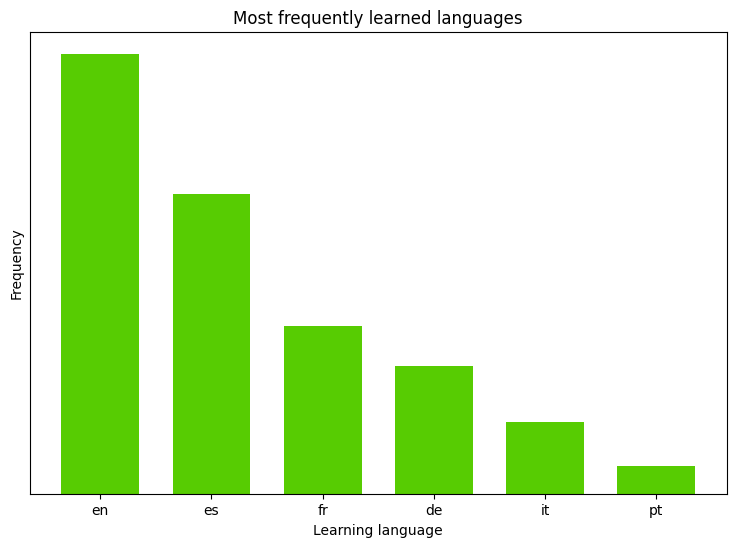

In [48]:
plt.figure(figsize=(9,6))

#Plotting the grouped dataframe with necessary fields for the chart
bar_plot = pd.DataFrame(learning_data['learning_language'].value_counts()).reset_index()
xis = [i for i in range(bar_plot['learning_language'].nunique())]
x1 = plt.bar(xis, bar_plot['count'], width = 0.7, color = '#57cc02')


#Fancy stuff
plt.title('Most frequently learned languages')
plt.yticks([])
plt.xticks(xis, bar_plot['learning_language'].unique())
plt.ylabel('Frequency')
plt.xlabel('Learning language')
plt.show()

In [51]:
learning_data.drop(['timestamp', 'user_id', 'ui_language'], axis=1, inplace= True)
learning_data.head()

,p_recall,delta,learning_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,27649635.0,de,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6.0,4.0,2.0,2.0
1,0.5,27649635.0,de,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4.0,4.0,2.0,1.0
2,1.0,27649635.0,de,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5.0,4.0,1.0,1.0
3,0.5,27649635.0,de,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6.0,5.0,2.0,1.0
4,1.0,27649635.0,de,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4.0,4.0,1.0,1.0


In [60]:
learning_data['learning_language'] = learning_data['learning_language'].astype("string")

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

categories=['learning_language']
for label in categories:
    learning_data[label]=LE.fit_transform(learning_data[label])

In [62]:
learning_data.drop(['lexeme_id', 'lexeme_string'], axis=1, inplace= True)

,p_recall,delta,learning_language,history_seen,history_correct,session_seen,session_correct
0,1.0,27649635.0,0,6.0,4.0,2.0,2.0
1,0.5,27649635.0,0,4.0,4.0,2.0,1.0
2,1.0,27649635.0,0,5.0,4.0,1.0,1.0
3,0.5,27649635.0,0,6.0,5.0,2.0,1.0
4,1.0,27649635.0,0,4.0,4.0,1.0,1.0


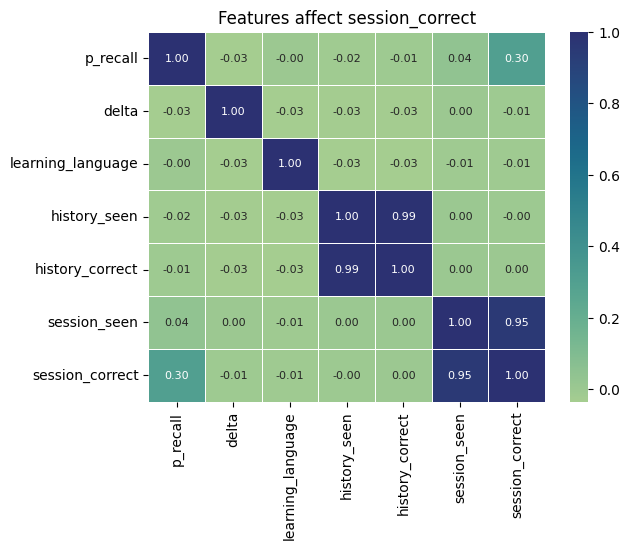

In [66]:
correlation=learning_data.corr()
sns.heatmap(correlation,annot=True,fmt=".2F",annot_kws={"size":8},linewidths=0.5,cmap="crest")
plt.title('Features affect session_correct')
plt.show()